In [40]:
## For data handling
import pandas as pd
import numpy as np
import keras

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)


2023-05-29 18:46:29.239666: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/var/folders/ll/fc4xw60j1q9dyncshnts8k_00000gn/T/ipykernel_79180/2827898307.py:14: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [21]:
#Reading in Data, note we had to set the delimiter so that it would correctly read into the data frame. 
# Since we got out data from the UCI repository it didn't need much cleaning at all

red = pd.read_csv('winequality-red.csv', sep=';')
white = pd.read_csv('winequality-white.csv', sep=';')



array([[<Axes: title={'center': 'quality'}>]], dtype=object)

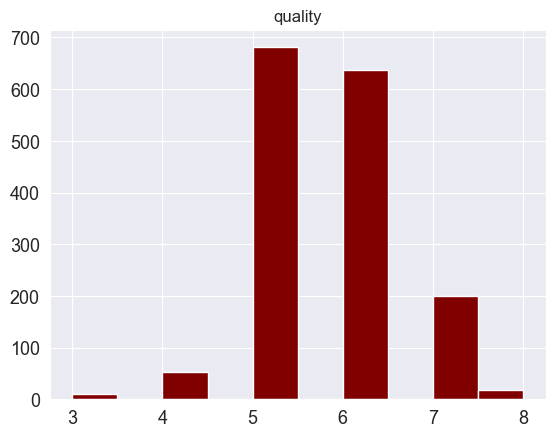

In [274]:
#Creating a histagram to visualize how our target variable is representented by the data, clearly most of the data falls
# into either 5 or 6 which we note caused us some problems later on and we ended up trying to drop the observation values of
# 3, 4, 8 and 9 from both data sets to remedy this 

red.hist(column='quality',color = 'maroon', xlabelsize = 13, ylabelsize = 13)

array([[<Axes: title={'center': 'quality'}>]], dtype=object)

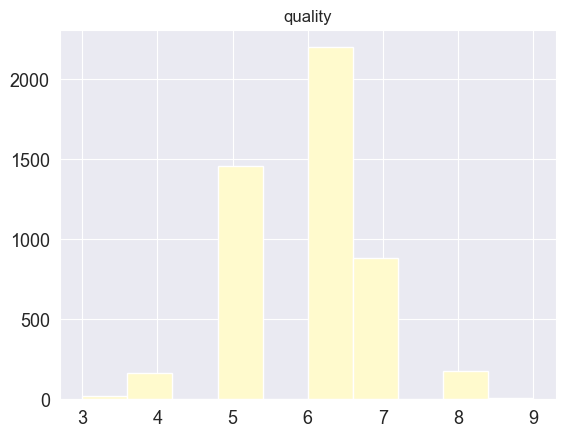

In [275]:
white.hist(column='quality', color = 'lemonchiffon', xlabelsize = 13, ylabelsize = 13)

In [28]:
# Examinging the shape of data

white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [29]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [30]:
## Now we import train_test_split
from sklearn.model_selection import train_test_split

<Axes: >

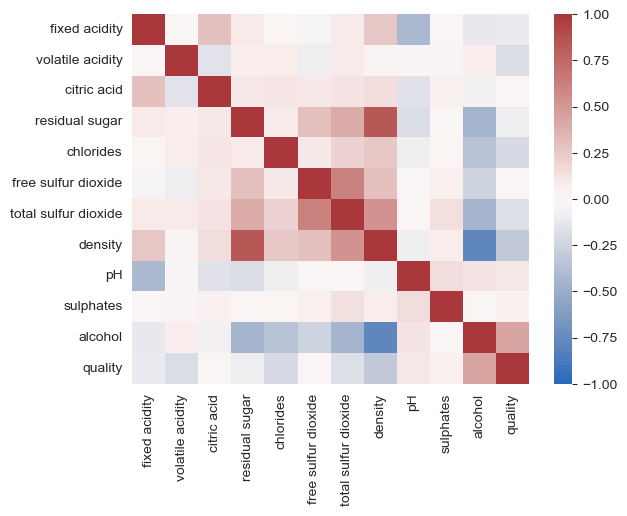

In [128]:
# First checking multicolinearity in our features since we are running a MLR model

sns.heatmap(data=white.corr(), vmax=1, vmin=-1, center=0, cmap='vlag')

In [130]:
# Then checking VIF score to confirm what variable we should possiby drop in both red and white cases we chose to 
# eliminate density variable

from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_scores(df):
    VIF_Scores = pd.DataFrame()
    VIF_Scores["Independent Features"] = df.columns
    VIF_Scores["VIF Scores"] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return VIF_Scores
df1 = white.iloc[:,:-1]
vif_scores(df1)

,Independent Features,VIF Scores
0,fixed acidity,92.861483
1,volatile acidity,9.730569
2,citric acid,10.007114
3,residual sugar,3.830272
4,chlorides,6.497448
5,free sulfur dioxide,9.261556
6,total sulfur dioxide,24.980802
7,density,1056.497431
8,pH,609.861725
9,sulphates,20.527123


In [166]:
white_drop =  white.drop(['density'], axis=1)

df1 = white_drop.iloc[:,:-1]
vif_scores(df1)

,Independent Features,VIF Scores
0,fixed acidity,58.337764
1,volatile acidity,9.683289
2,citric acid,10.002239
3,residual sugar,3.429412
4,chlorides,6.093775
5,free sulfur dioxide,9.210046
6,total sulfur dioxide,24.980442
7,pH,160.145168
8,sulphates,20.526697
9,alcohol,103.478234


In [279]:
## Here we make the split
## train_test_split returns 4 outputs: X_train, X_test, y_train and y_test
##
## Here is where we also dropped the observations of values that didn't appear often
##


white_drop= white_drop[white_drop['quality'] != 9]
white_drop= white_drop[white_drop['quality'] != 3]
white_drop= white_drop[white_drop['quality'] != 8]
white_drop= white_drop[white_drop['quality'] != 4]

wquality= white_drop['quality']
wX = white_drop.drop('quality', axis=1)

wX_train, wX_test, wy_train, wy_test = train_test_split(wX, wquality,
                                                       shuffle = True,
                                                       random_state = 440,
                                                       test_size = .2)

In [280]:
## Make the model object

reg = LinearRegression(copy_X=True, fit_intercept=True)

## Fit the model object

reg.fit(wX_train, wy_train)

LinearRegression()

In [281]:
## look at coef

reg.coef_

array([-2.19704160e-02, -1.45885063e+00, -1.22687785e-01,  1.60370183e-02,
       -8.38490375e-01,  3.11953314e-03, -1.00714041e-03,  8.69168443e-02,
        4.37365722e-01,  2.87438727e-01])

In [282]:
reg.intercept_

2.9219508925529993

In [283]:
## Make a prediction
wy_pred_sklearn = reg.predict(wX_test)

wy_pred_sklearn = np.round(wy_pred_sklearn,0)

print("Accuracy: ", accuracy_score(wy_test, wy_pred_sklearn))

Accuracy:  0.5843439911797134


In [284]:
# Creating a truth table of values to see how many we correctly predicted

conmat = confusion_matrix(wy_test, wy_pred_sklearn)
val = np.mat(conmat) 

classnames = list(set(wy_train))

df_cm = pd.DataFrame(

        val, index=classnames, columns=classnames, 

    )

print(df_cm)

df_cm = df_cm.astype('float') / df_cm.sum(axis=1)[:, np.newaxis]  

     5    6   7
5  106  180  1 
6  37   405  11
7  0    148  19


/var/folders/ll/fc4xw60j1q9dyncshnts8k_00000gn/T/ipykernel_79180/2536129746.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df_cm = df_cm.astype('float') / df_cm.sum(axis=1)[:, np.newaxis]


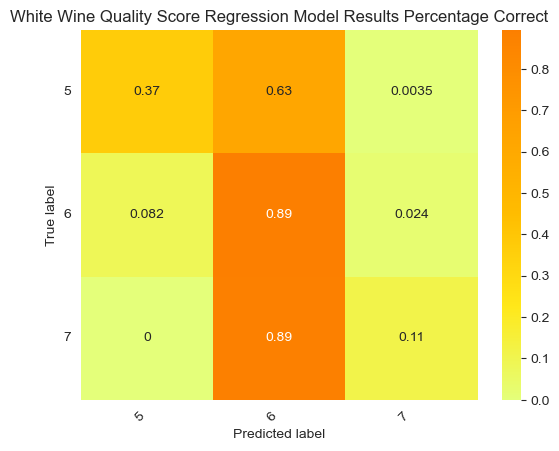

In [285]:
# Turning this into a heatmap with percentages

plt.figure()

heatmap = sns.heatmap(df_cm, annot=True, cmap="Wistia")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')

heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

plt.ylabel('True label')

plt.xlabel('Predicted label')

plt.title('White Wine Quality Score Regression Model Results Percentage Correct')

plt.show()

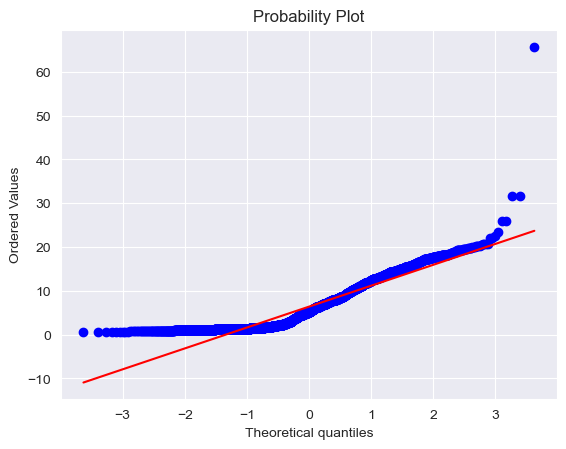

In [187]:
import scipy.stats as stats
import pylab
import statsmodels.api as sm

stats.probplot(white['residual sugar'], dist="norm", plot=pylab)
pylab.show()

<Axes: >

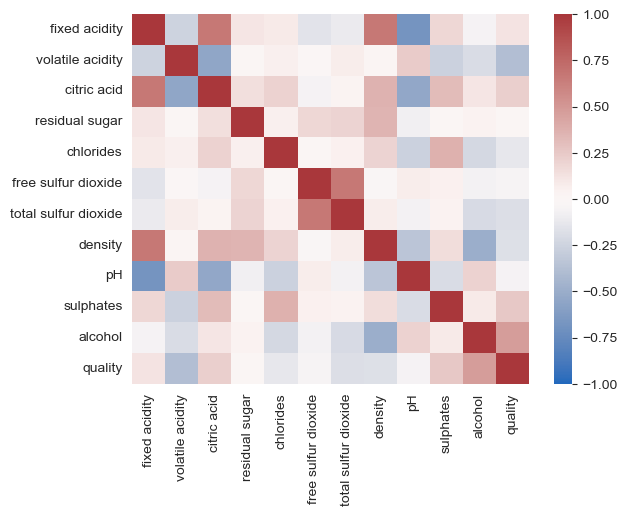

In [227]:
sns.heatmap(data=red.corr(), vmax=1, vmin=-1, center=0, cmap='vlag')

In [229]:
df1 = red.iloc[:,:-1]
vif_scores(df1)

,Independent Features,VIF Scores
0,fixed acidity,74.452265
1,volatile acidity,17.060026
2,citric acid,9.183495
3,residual sugar,4.662992
4,chlorides,6.554877
5,free sulfur dioxide,6.442682
6,total sulfur dioxide,6.519699
7,density,1479.287209
8,pH,1070.967685
9,sulphates,21.590621


In [230]:
red_drop =  red.drop(['density'], axis=1)
df1 = red_drop.iloc[:,:-1]
vif_scores(df1)

,Independent Features,VIF Scores
0,fixed acidity,40.216574
1,volatile acidity,17.058940
2,citric acid,9.149028
3,residual sugar,4.662789
4,chlorides,6.017799
5,free sulfur dioxide,6.390157
6,total sulfur dioxide,6.096300
7,pH,158.025734
8,sulphates,21.552410
9,alcohol,121.980842


In [286]:
## Here we make the split
## train_test_split returns 4 outputs: X_train, X_test, y_train and y_test
##
## First you input the X and y for your data
##
## then set the shuffle argument to True, this randomly shuffles the
## data before it is split
##
## The random_state ensures that the random split is the same each time
## someone runs the code chunk, it can be any strictly positive integer
##
## You can specify the size of the test set with test_size,
## here I want 20% of the data

red_drop= red_drop[red_drop['quality'] != 9]
red_drop= red_drop[red_drop['quality'] != 3]
red_drop= red_drop[red_drop['quality'] != 8]
red_drop= red_drop[red_drop['quality'] != 4]



rquality= red_drop['quality']
rX = red_drop.drop('quality', axis=1)

rX_train, rX_test, ry_train, ry_test = train_test_split(rX, rquality,
                                                       shuffle = True,
                                                       random_state = 440,
                                                       test_size = .2)

In [287]:
## Make the model object
## notice we have to us fit_intercept = False
## because X_train has a column of 1s
reg = LinearRegression(copy_X=True, fit_intercept=True)

## Fit the model object
## note I do NOT have to use reshape here
## because X_train is a 2D np.array
reg.fit(rX_train, ry_train)

LinearRegression()

In [288]:
## look at coef
np.round(reg.coef_,4)

array([ 0.0174, -0.6964, -0.0667,  0.0202, -1.5925,  0.0041, -0.004 ,
       -0.2113,  0.7691,  0.2607])

In [289]:
np.round(reg.intercept_,4)

3.5983

In [290]:
## Make a prediction
ry_pred_sklearn = reg.predict(rX_test)

ry_pred_sklearn = np.round(ry_pred_sklearn,0)

print("Accuracy: ", accuracy_score(ry_test, ry_pred_sklearn))

Accuracy:  0.631578947368421


In [291]:
conmat = confusion_matrix(wy_test, wy_pred_sklearn)
val = np.mat(conmat) 

classnames = list(set(wy_train))

df_cm = pd.DataFrame(

        val, index=classnames, columns=classnames, 

    )

print(df_cm)

df_cm = df_cm.astype('float') / df_cm.sum(axis=1)[:, np.newaxis]  

     5    6   7
5  106  180  1 
6  37   405  11
7  0    148  19


/var/folders/ll/fc4xw60j1q9dyncshnts8k_00000gn/T/ipykernel_79180/2536129746.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df_cm = df_cm.astype('float') / df_cm.sum(axis=1)[:, np.newaxis]


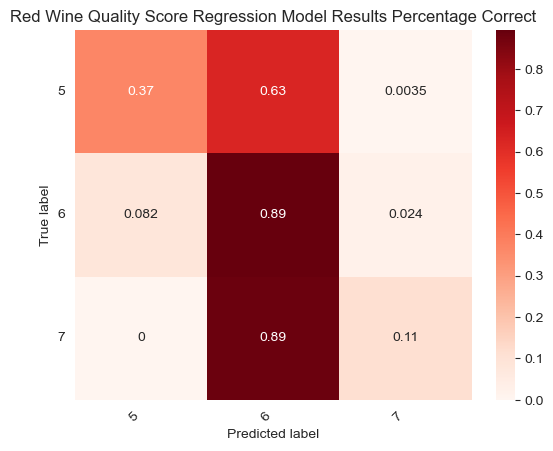

In [292]:
plt.figure()

heatmap = sns.heatmap(df_cm, annot=True, cmap="Reds")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')

heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

plt.ylabel('True label')

plt.xlabel('Predicted label')

plt.title('Red Wine Quality Score Regression Model Results Percentage Correct')

plt.show()